In [1]:
from glob import glob 
import numpy as np
import pandas as pd
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D
import sklearn
import matplotlib.pyplot as plt
from PIL import Image
print("done import")

2024-04-07 08:00:32.098373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


done import


In [2]:
path = '/Users/yehonatanperetz/histopathologic-cancer-detection/'
train_path = '/Users/yehonatanperetz/histopathologic-cancer-detection/train/'
test_path = '/Users/yehonatanperetz/histopathologic-cancer-detection/test/'

In [3]:
full_train_df = pd.read_csv(path+"train_labels.csv")
full_train_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [4]:
print("Train Size: {}".format(len(os.listdir(train_path))))
print("Test Size: {}".format(len(os.listdir(test_path))))

Train Size: 220025
Test Size: 57458


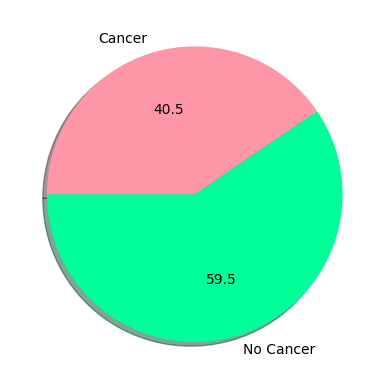

<Figure size 1600x1600 with 0 Axes>

In [5]:
labels_count = full_train_df.label.value_counts()

%matplotlib inline
plt.pie(labels_count, labels=['No Cancer', 'Cancer'], startangle=180, 
        autopct='%1.1f', colors=['#00ff99','#FF96A7'], shadow=True)
plt.figure(figsize=(16,16))
plt.show()


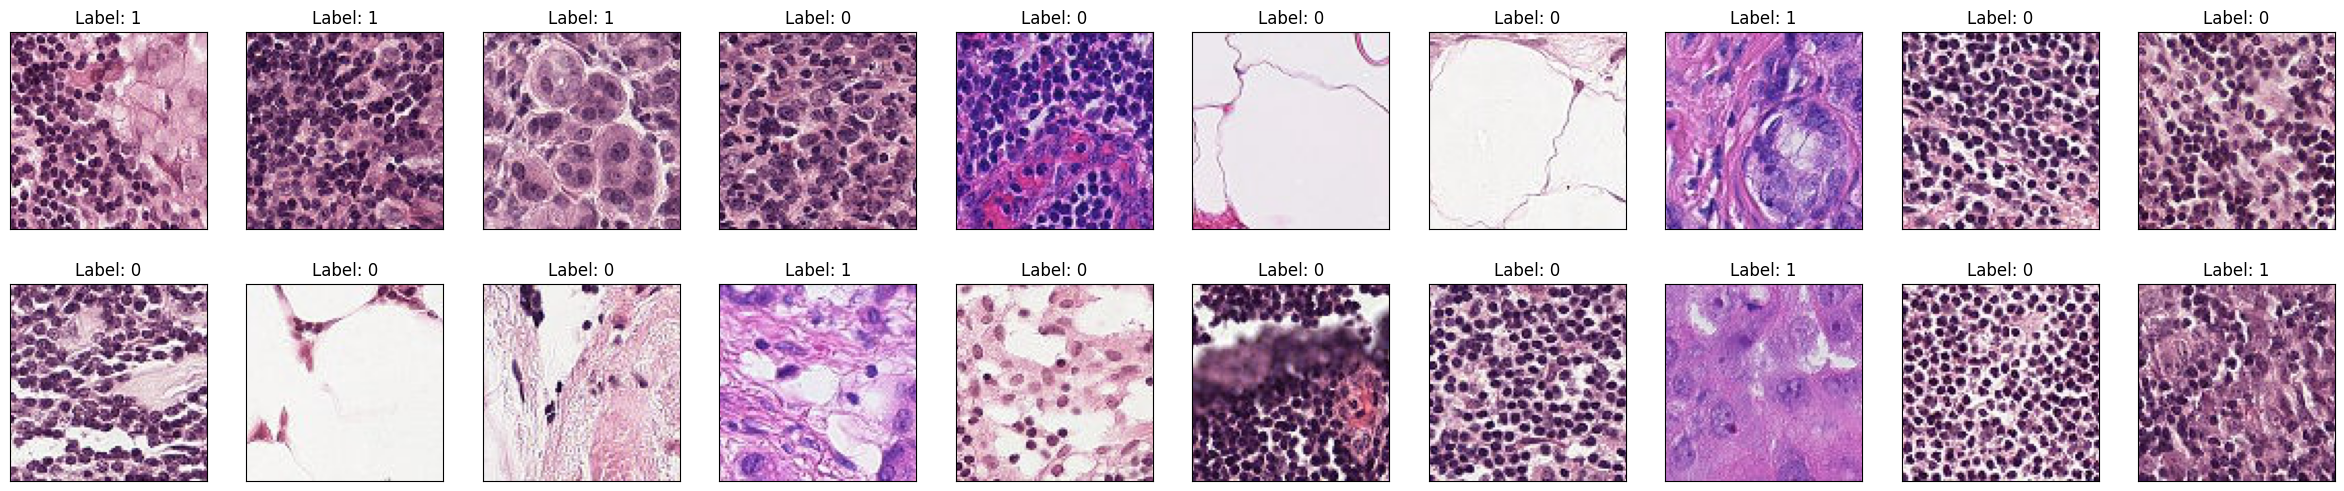

In [6]:
fig = plt.figure(figsize=(30, 6))
# display 20 images
train_imgs = os.listdir(train_path)
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    im = Image.open(train_path + img)
    plt.imshow(im)
    lab = full_train_df.loc[full_train_df['id'] == img.split('.')[0], 'label'].values[0]
    ax.set_title('Label: %s'%lab)

In [7]:
# Number of samples in each class
SAMPLE_SIZE = 800


# Use 80000 positive and negative examples
df_negatives = full_train_df[full_train_df['label'] == 0].sample(SAMPLE_SIZE, random_state=42)
df_positives = full_train_df[full_train_df['label'] == 1].sample(SAMPLE_SIZE, random_state=42)

# Concatenate the two dfs and shuffle them up
train_df = sklearn.utils.shuffle(pd.concat([df_positives, df_negatives], axis=0).reset_index(drop=True))

train_df.shape

(1600, 2)

In [13]:
print(train_df.head(2))
print(train_imgs[1])

                                            id  label
1060  285d25ee11fbb5373363c69b3993102dc0e4190c      0
1369  ae77d4e53204f09c434260b1d09fa3ef6f1b6ed3      0
99ef485f205645918613cd04281098daa7c17819.tif


In [19]:
img=Image.open(train_path+train_imgs[1])
img_rgb = img.convert('RGB')

img_array = np.array(img_rgb)
print(img)
print(img_array.shape)

<PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=96x96 at 0x15213C290>
(96, 96, 3)
